In [1]:
%pylab inline
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.esda.mapclassify import User_Defined

Populating the interactive namespace from numpy and matplotlib


In [2]:
datos = pd.read_excel('Datos/Base_Elecciones_dta.xlsx')
#datps = gp.GeoDataFrame(datos)
mpios = gp.read_file('Datos/mpio/mpio.shp')
datos = gp.GeoDataFrame(datos)
mpios['cod_danelong'] = mpios['MPIOS'].astype('int')

In [3]:
datos = datos.merge(mpios,on='cod_danelong')

In [4]:
datos['porcentaje_si'] = pd.Series() 
datos['porcentaje_si'][datos['ganador1si2no']==1] = datos['porcentaje_ganador']
datos['porcentaje_si'][datos['ganador1si2no']==2] = 1. - datos['porcentaje_ganador']

/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/saf537/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


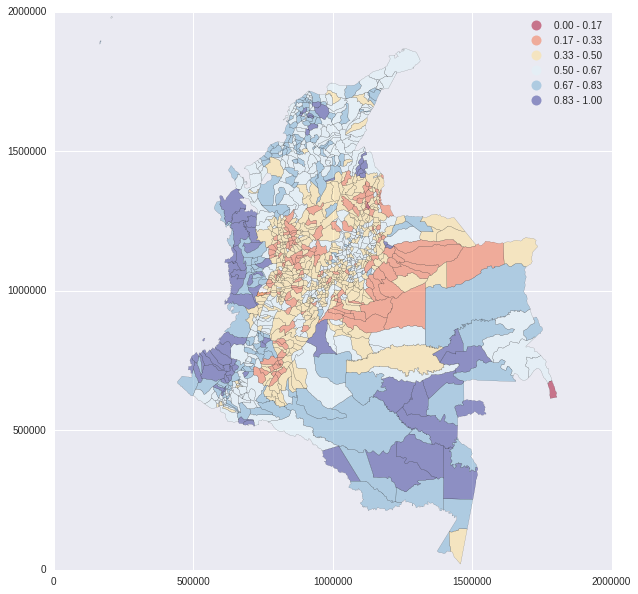

In [5]:
datos.plot('porcentaje_si',cmap='RdYlBu',linewidth=0.1,scheme='equal_interval',legend=True,k=6,figsize=(10,10))